# 모듈 로드

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
from tqdm import tqdm_notebook
import xgboost as xgb
import lightgbm as lgb
from scipy.sparse import vstack, csr_matrix, save_npz, load_npz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")
gc.enable()
sns.set()

In [2]:
pd.set_option('max_rows', 200)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

# 데이터 로드

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.shape, test.shape

((200000, 202), (200000, 201))

In [4]:
col_list = train.columns[2:]

In [7]:
test['target'] = np.nan
data = train.append(test)

In [9]:
col_list = data.columns[2:]

# unique value

In [14]:
unique = []
for col in tqdm_notebook(col_list):
    unique.append(data[col].nunique())

In [15]:
min_max = []
for col in tqdm_notebook(col_list):
    min_max.append(data[col].max() - data[col].min())

In [18]:
temp = pd.DataFrame({"nunique": unique, "max-min": min_max}, index=col_list)

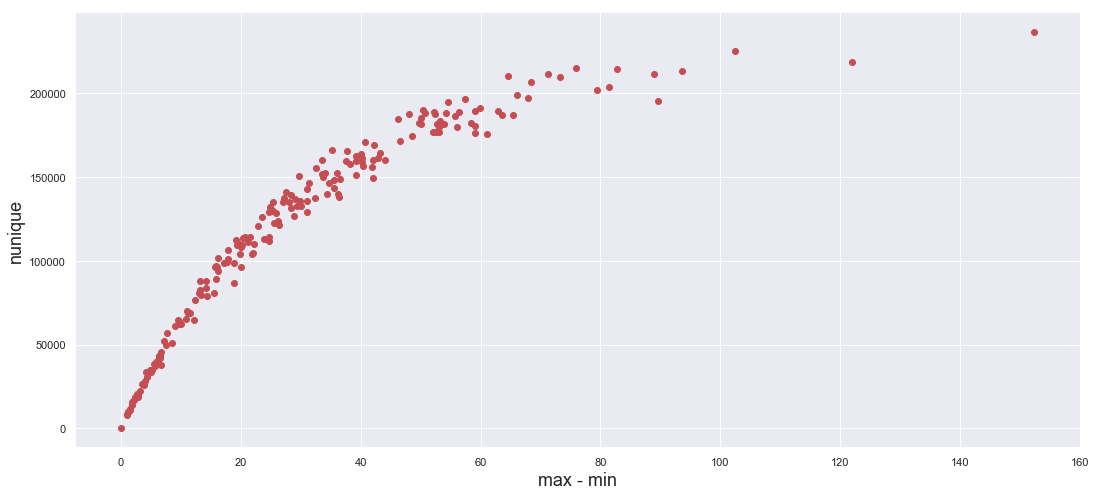

In [33]:
plt.figure(figsize = (18, 8))
plt.plot(temp['max-min'], temp['nunique'], 'ro')
plt.xlabel("max - min", fontsize=18)
plt.ylabel("nunique", fontsize=18)
plt.show()

In [38]:
temp.sort_values(['max-min'])

,nunique,max-min
var_68,461,0.0531
var_91,8197,0.9796
var_108,8651,1.0140
var_12,9737,1.2575
var_103,9634,1.2722
var_161,11359,1.4911
var_148,10894,1.5023
var_71,13968,1.7959
var_43,15589,1.9335
var_25,15348,1.9346


In [85]:
temp = sorted(np.around(data.var_68.unique(), 5))
result = []
for i in range(len(temp) - 1):
    result.append(temp[i + 1] - temp[i])

result = np.around(result, 5)
pd.Series(result).value_counts()

0.0001    442
0.0002      6
0.0004      4
0.0003      2
0.0013      2
0.0007      2
0.0006      1
0.0009      1
dtype: int64

In [89]:
temp = sorted(np.around(data.var_29.unique(), 5))
result = []
for i in range(len(temp) - 1):
    result.append(temp[i + 1] - temp[i])

result = np.around(result, 5)
pd.Series(result).value_counts()

0.0001    84034
0.0002     9497
0.0003     3200
0.0004     1510
0.0005      821
0.0006      491
0.0007      281
0.0008      201
0.0009      141
0.0010      118
0.0011       81
0.0012       61
0.0014       57
0.0013       51
0.0015       43
0.0018       32
0.0016       25
0.0020       24
0.0021       20
0.0019       18
0.0022       18
0.0024       17
0.0025       15
0.0017       15
0.0028       14
0.0023       13
0.0026       11
0.0027       10
0.0031       10
0.0032        9
0.0033        9
0.0029        9
0.0035        9
0.0030        8
0.0044        5
0.0036        5
0.0040        5
0.0039        4
0.0037        4
0.0041        4
0.0042        4
0.0072        3
0.0053        3
0.0060        3
0.0098        3
0.0055        3
0.0045        3
0.0073        3
0.0062        3
0.0049        3
0.0198        3
0.0034        3
0.0059        3
0.0067        3
0.0066        3
0.0106        2
0.0047        2
0.0099        2
0.0114        2
0.0064        2
0.0052        2
0.0103        2
0.0046  